In [1]:
#Importing all useful directories for this project:

import pandas as pd
import numpy as np
import zipfile
import pycountry
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

### Method to download data from Kaggle directly

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
#Downloading dataset kaggle api
!kaggle datasets download -d heesoo37/120-years-of-olympic-history-athletes-and-results
dataset = '/Users/bilal/Downloads/Project/120-years-of-olympic-history-athletes-and-results.zip'
Extracting the files from the downloaded zipfile
with zipfile.ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall()

In [2]:
df_olympic = pd.read_csv('athlete_events.csv')
df_olympic.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
mapping_country = pd.read_csv('noc_regions.csv')
mapping_country.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
mapping_country.drop('notes', inplace=True, axis=1)

In [5]:
mapping_country = mapping_country.rename({'region':'Country'}, axis =1)
mapping_country.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [6]:
df_olympic = df_olympic.merge(mapping_country, on='NOC', how='left')
df_olympic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [7]:
df_olympic.describe()
df_olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       271116 non-null  int64  
 1   Name     271116 non-null  object 
 2   Sex      271116 non-null  object 
 3   Age      261642 non-null  float64
 4   Height   210945 non-null  float64
 5   Weight   208241 non-null  float64
 6   Team     271116 non-null  object 
 7   NOC      271116 non-null  object 
 8   Games    271116 non-null  object 
 9   Year     271116 non-null  int64  
 10  Season   271116 non-null  object 
 11  City     271116 non-null  object 
 12  Sport    271116 non-null  object 
 13  Event    271116 non-null  object 
 14  Medal    39783 non-null   object 
 15  Country  270746 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 33.1+ MB


#### Data Completeness: <br>
Olympic data has missing data problems specifically in the columns age, height and weight.<br>
The Medal folder also has a huge chunk of missing value but that is understandable because when athletes don't win any medal they intentionally make it blank. 

In [8]:
df_olympic_duplicate = df_olympic[df_olympic.duplicated()]

In [9]:
df_olympic_duplicate

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
1252,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium
4282,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA
4283,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA
4862,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany
4864,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269994,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,UK
269995,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,UK
269997,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK
269999,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK


Olympic data has 271116 unique values and we can see that there are 1385 duplicated values which should be removed before analysis as it will affect our analysis. <br>

### Olympic Data Cleaning: 
1. Drop duplicate.
2. Removing non useful columns.
3. Replacing NAN values in medal with No medal.

In [10]:
# Droping duplicates:
df_olympic = df_olympic.drop_duplicates()
df_olympic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ID       269731 non-null  int64  
 1   Name     269731 non-null  object 
 2   Sex      269731 non-null  object 
 3   Age      260416 non-null  float64
 4   Height   210917 non-null  float64
 5   Weight   208204 non-null  float64
 6   Team     269731 non-null  object 
 7   NOC      269731 non-null  object 
 8   Games    269731 non-null  object 
 9   Year     269731 non-null  int64  
 10  Season   269731 non-null  object 
 11  City     269731 non-null  object 
 12  Sport    269731 non-null  object 
 13  Event    269731 non-null  object 
 14  Medal    39772 non-null   object 
 15  Country  269361 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.0+ MB


In [11]:
# removing non useful columns
df_olympic = df_olympic.drop(columns = ['Height', 'Weight', 'Team', 'Games', 'City'], axis=1)
df_olympic.head()

,ID,Name,Sex,Age,NOC,Year,Season,Sport,Event,Medal,Country
0,1,A Dijiang,M,24.0,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN,China
2,3,Gunnar Nielsen Aaby,M,24.0,DEN,1920,Summer,Football,Football Men's Football,NaN,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [12]:
df_olympic = df_olympic.rename({'NOC':'Country_code'}, axis =1)

In [13]:
df_olympic = df_olympic.reindex(columns=['ID', 'Name', 'Sex','Age', 'Country_code', 'Country', 'Sport','Event','Year', 'Medal'])
df_olympic.sample(10)

,ID,Name,Sex,Age,Country_code,Country,Sport,Event,Year,Medal
267439,133801,Miloud Zakka,M,NaN,LBA,Libya,Volleyball,Volleyball Men's Volleyball,1980,NaN
66656,34095,Brian A. Farlow,M,19.0,ISV,"Virgin Islands, US",Swimming,Swimming Men's 200 metres Individual Medley,1984,NaN
242517,121463,Aymen Al-Toumi,M,22.0,TUN,Tunisia,Handball,Handball Men's Handball,2012,NaN
75490,38322,Gang Hyeok,M,21.0,KOR,South Korea,Baseball,Baseball Men's Baseball,1996,NaN
76400,38765,"Elizabeth ""Liz"" Gardner",F,29.0,AUS,Australia,Freestyle Skiing,Freestyle Skiing Women's Aerials,2010,NaN
8698,4778,Marcel Abner Pvoa Arago,M,22.0,BRA,Brazil,Judo,Judo Men's Half-Middleweight,2000,NaN
202049,101481,Jos Mara Robledo,M,25.0,ARG,Argentina,Rowing,Rowing Men's Double Sculls,1964,NaN
232634,116689,Agata Katarzyna Suszka,F,22.0,POL,Poland,Biathlon,Biathlon Women's 15 kilometres,1994,NaN
225051,113064,Son Bong-Gak,M,30.0,KOR,South Korea,Equestrianism,"Equestrianism Mixed Jumping, Team",2004,NaN
162192,81434,Evelyn Aubrey Montague,M,24.0,GBR,UK,Athletics,"Athletics Men's 3,000 metres Steeplechase",1924,NaN


In [14]:
df_olympic['Medal'] = df_olympic['Medal'].fillna('No Medal')
df_olympic['Medal'].sample(10)

139938    No Medal
173860    No Medal
169018      Bronze
231365    No Medal
225675    No Medal
80467     No Medal
87341       Silver
187043    No Medal
266255    No Medal
151769    No Medal
Name: Medal, dtype: object

In [15]:
df_olympic['Age'].isnull().sum()
df_olympic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 269731 entries, 0 to 271115
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            269731 non-null  int64  
 1   Name          269731 non-null  object 
 2   Sex           269731 non-null  object 
 3   Age           260416 non-null  float64
 4   Country_code  269731 non-null  object 
 5   Country       269361 non-null  object 
 6   Sport         269731 non-null  object 
 7   Event         269731 non-null  object 
 8   Year          269731 non-null  int64  
 9   Medal         269731 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 22.6+ MB


mean_age = df_olympic['Age'][df_olympic['Age'] != 0].mean()
df_olympic['Age'] = df_olympic['Age'].replace(0, mean_age)

# Analysis:
## Athletes Age distribution:

Text(0.5, 1.0, 'Age Distribution')

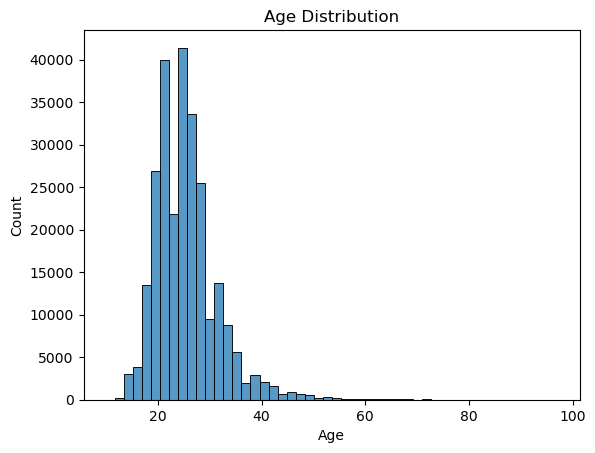

In [16]:
age  = sns.histplot(data=df_olympic, x='Age', bins=50)
age.set_title('Age Distribution')

In [17]:
interval = [0, 20.0, 25.0, 30.0 , 40.0, df_olympic['Age'].max()]
labels = ['Under 20', '20-25', '25-30', '30-40', 'Above 50']
df_olympic['age_int'] = pd.cut(df_olympic['Age'], interval, labels = labels, include_lowest= True, right = False)
df_olympic['age_int'].value_counts().sort_index()

age_int
Under 20    32299
20-25       98784
25-30       78820
30-40       42460
Above 50     8052
Name: count, dtype: int64

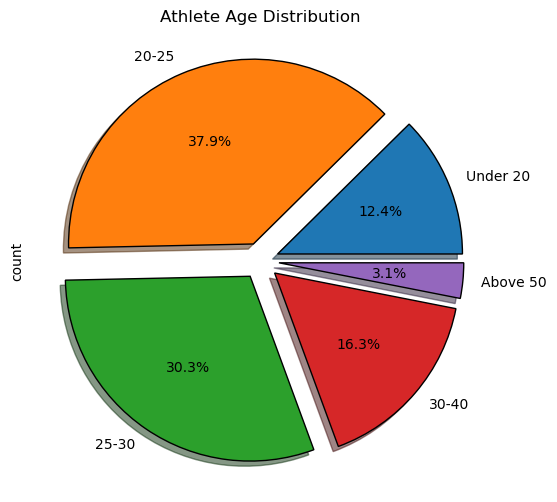

In [18]:
df_olympic['age_int'].value_counts().sort_index().plot(kind = 'pie', figsize = [10,6],autopct='%1.1f%%', explode = (0.1, 0.1, 0.1, 0.1, 0.1),shadow = True ,wedgeprops = {"edgecolor": "black"});

plt.title('Athlete Age Distribution', fontsize = 12)
plt.show()

## Athletes Gender Distribution in Olympics History:

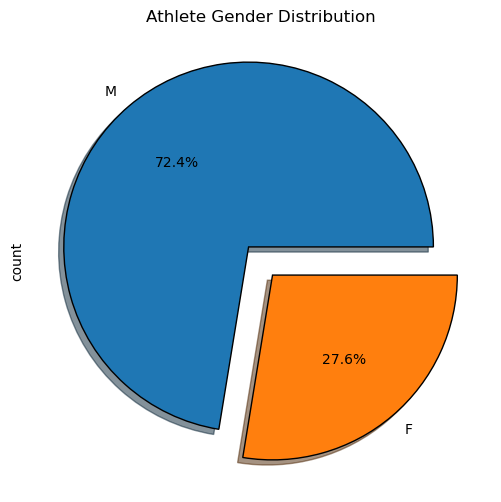

In [19]:
df_olympic['Sex'].value_counts().plot(kind = 'pie', figsize = [10,6],autopct='%1.1f%%', explode = (0.1, 0.1),shadow = True ,wedgeprops = {"edgecolor": "black"});
plt.title('Athlete Gender Distribution', fontsize = 12)
plt.show()

## Athletes Gender Distribution over the Years:

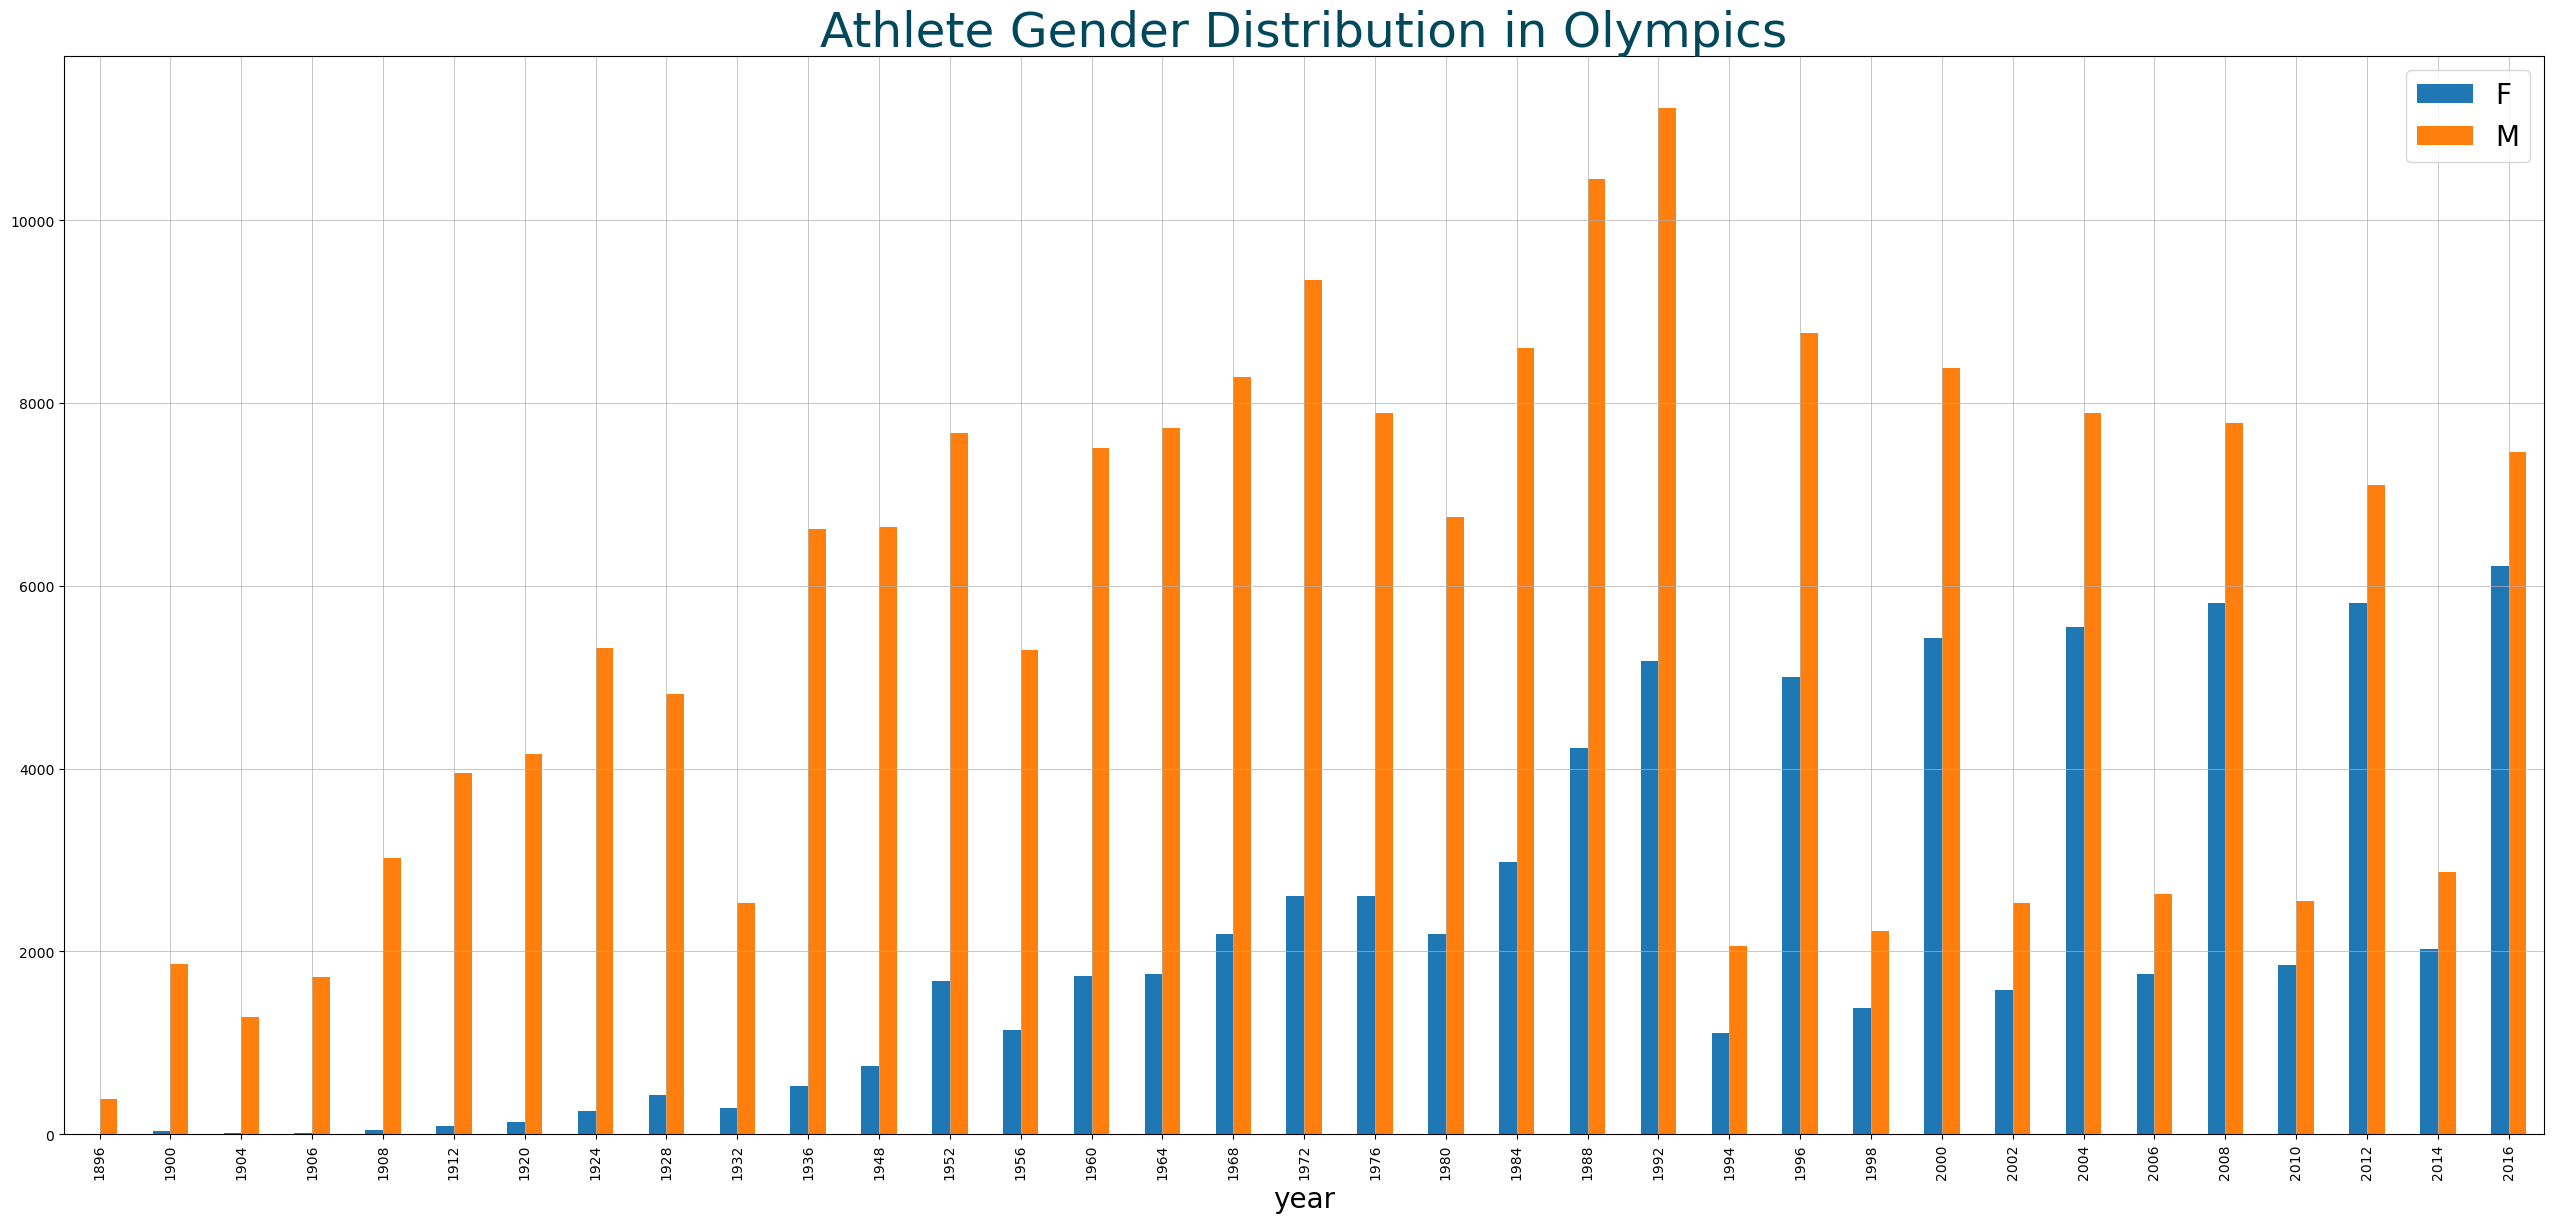

In [20]:
gender_graph = df_olympic.groupby(['Year', 'Sex'])
gender_graph['ID'].count().unstack().plot(kind = 'bar', figsize = [32,14]);

plt.title('Athlete Gender Distribution in Olympics',color = "#02485c", fontsize = 35);
plt.xlabel('year', fontsize = 20)

plt.grid(True, which='both', linewidth=0.5)
plt.legend(fontsize=20)
plt.show()

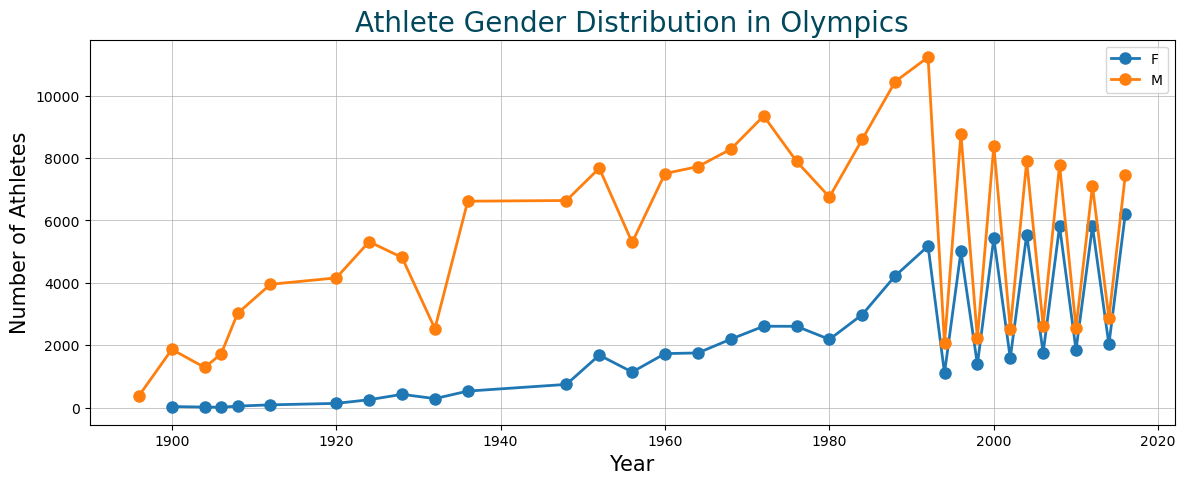

In [21]:
gender_graph = df_olympic.groupby(['Year', 'Sex'])['ID'].count().unstack()

# Plotting the data as a line graph
gender_graph.plot(figsize = [14,5], marker='o', linestyle='-', linewidth=2, markersize=8);

# Adding titles and labels
plt.title('Athlete Gender Distribution in Olympics', color="#02485c", fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Athletes', fontsize=15)

# Displaying grid and legend
plt.grid(True, which='both', linewidth=0.5)
plt.legend(fontsize=10)
plt.show()

##  Athlete with most gold medals in history?

In [22]:
gold_medals = df_olympic[df_olympic['Medal'] == 'Gold']
gold_medals_counts = gold_medals['Name'].value_counts()

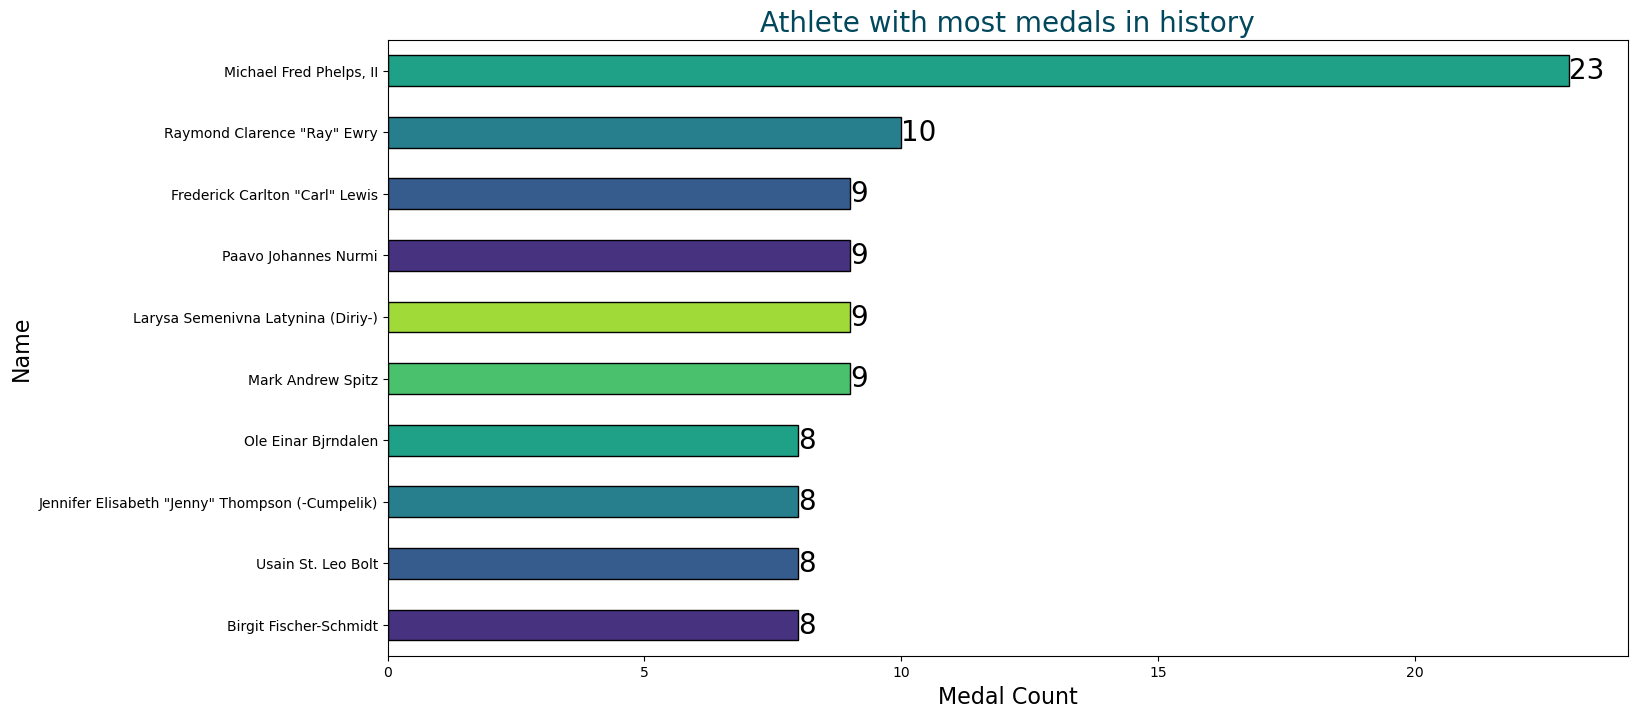

In [23]:
top_medals = gold_medals_counts.head(10).sort_values(ascending=True)

colors = sns.color_palette("viridis")
ax = top_medals.plot(kind = 'barh', edgecolor = 'black', color=colors, rot = 0, figsize = [16,8])
ax.bar_label(ax.containers[0], fontsize = 20)

plt.title('Athlete with most medals in history', color = "#02485c", fontsize = 20)
plt.xlabel('Medal Count', fontsize = 16)
plt.ylabel('Name', fontsize = 16)
plt.show()

### 2. Get the top 5 medal-winning nations from the Olympics?

In [24]:
countries_medal = df_olympic.query('Medal != "No Medal"').groupby('Country').size().sort_values(ascending= False).iloc[:10]

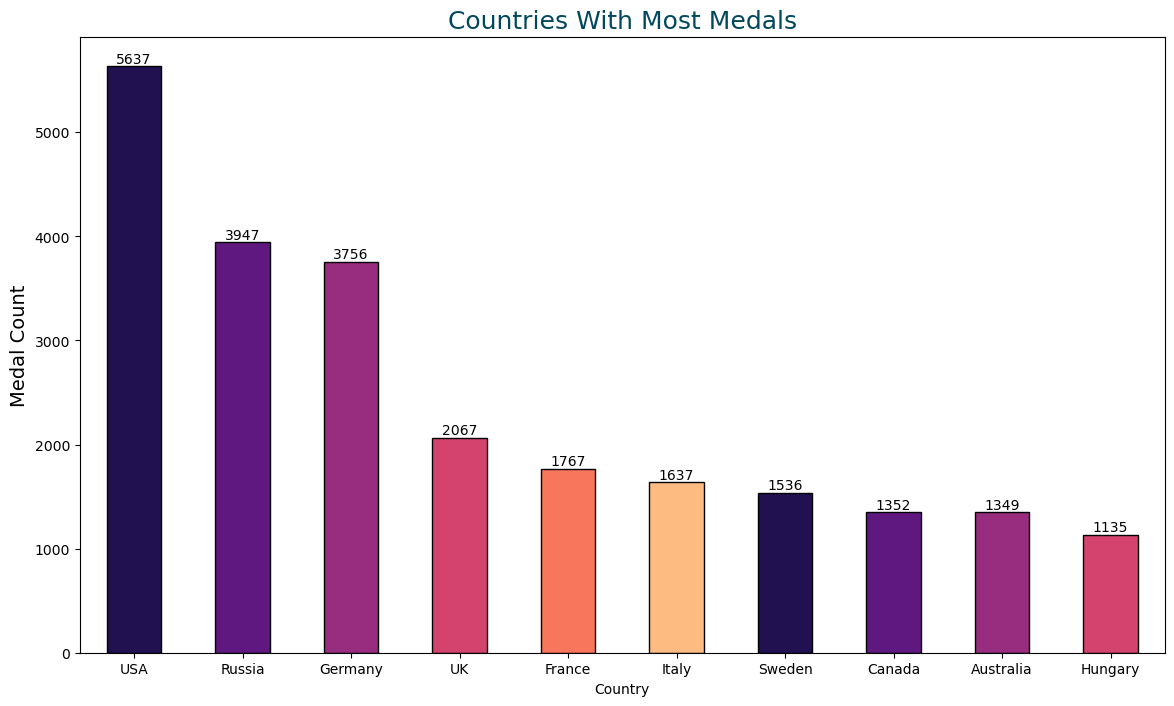

In [25]:
colors = sns.color_palette("magma")
ax = countries_medal.plot(kind = 'bar', color = colors, edgecolor = 'black', rot = 0, figsize = [14,8])
ax.bar_label(ax.containers[0], fontsize = 10)

plt.title('Countries With Most Medals', color = "#02485c", fontsize = 18)
plt.ylabel('Country Name', fontsize  = 14)
plt.ylabel('Medal Count', fontsize  = 14)
plt.show()

## How many gold, silver, and bronze medals did each nation win in total

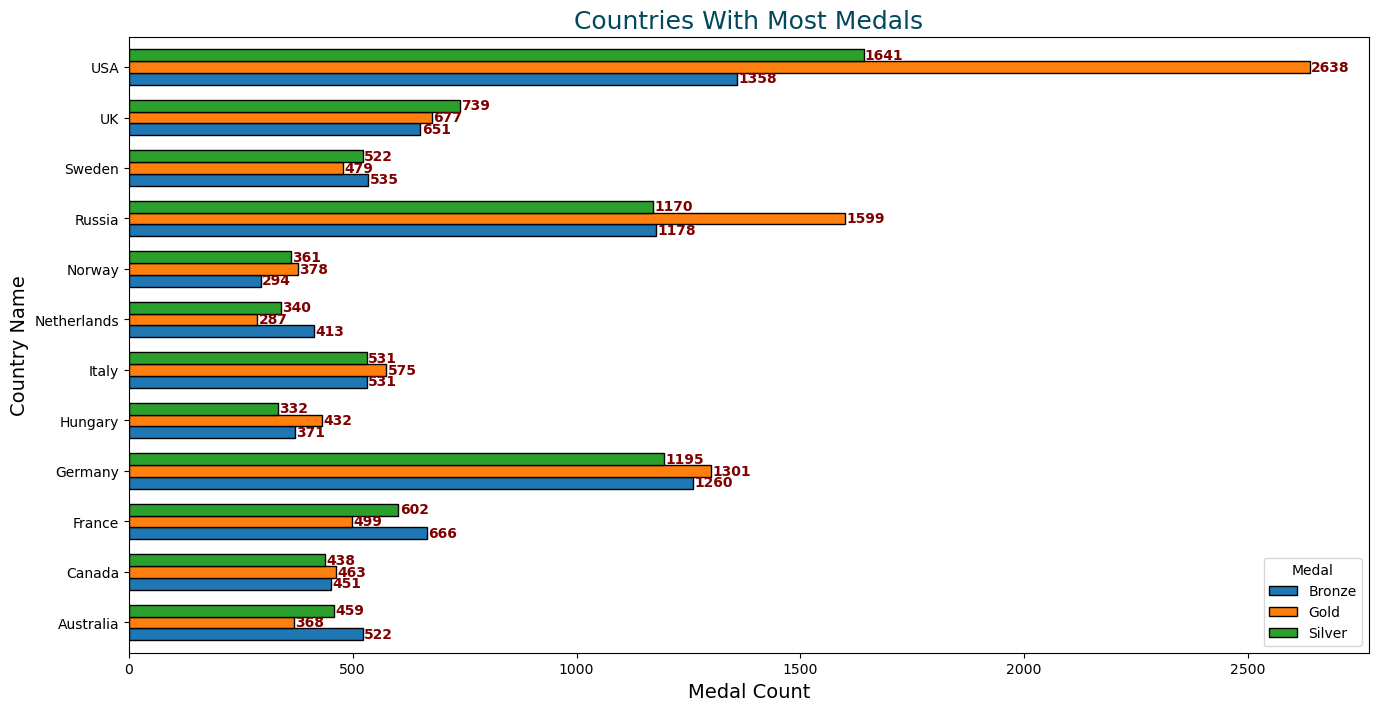

In [26]:
all_medals = (df_olympic.query('Medal != "No Medal"')
              .groupby('Country')
              .filter(lambda grp: len(grp) > 1000)
              .groupby(['Country', 'Medal']).size()
              .unstack())
# Create the bar plot
fig, ax = plt.subplots(figsize=(16, 8))
all_medals.plot(kind='barh', edgecolor='black', rot=0, ax=ax, width = 0.7)
# Adding labels to bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding = 1, color = 'maroon', weight = 'bold')
# Customize the plot
plt.title('Countries With Most Medals', color="#02485c", fontsize=18)
plt.ylabel('Country Name', fontsize=14)
plt.xlabel('Medal Count', fontsize=14)
plt.show()

## Most Gold Medals in Last Olympic:

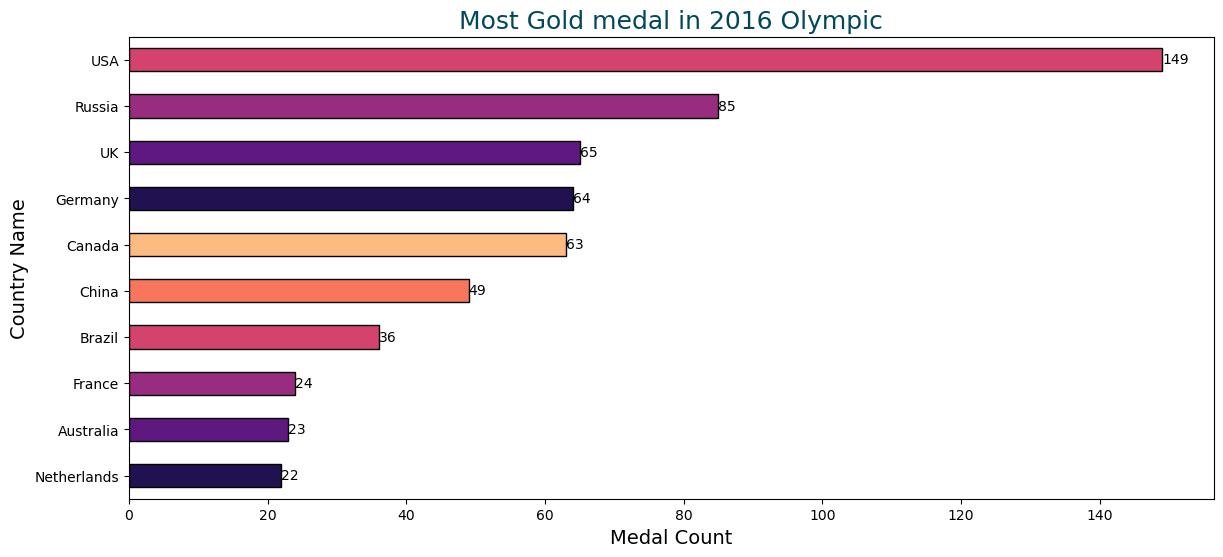

In [27]:
gold_2016 = df_olympic.query('Year > 2012 and Medal == "Gold"').groupby('Country').size().sort_values(ascending= False).iloc[:10]
gold_2016_sort = gold_2016.sort_values(ascending= True)

colors = sns.color_palette("magma")
ax = gold_2016_sort.plot(kind = 'barh', color = colors, edgecolor = 'black', rot = 0, figsize = [14,6])
ax.bar_label(ax.containers[0], fontsize = 10)

plt.title('Most Gold medal in 2016 Olympic', color = "#02485c", fontsize = 18)
plt.ylabel('Country Name', fontsize  = 14)
plt.xlabel('Medal Count', fontsize  = 14)
plt.show()

## USA Medal Count from Top Five Sports in 2016:

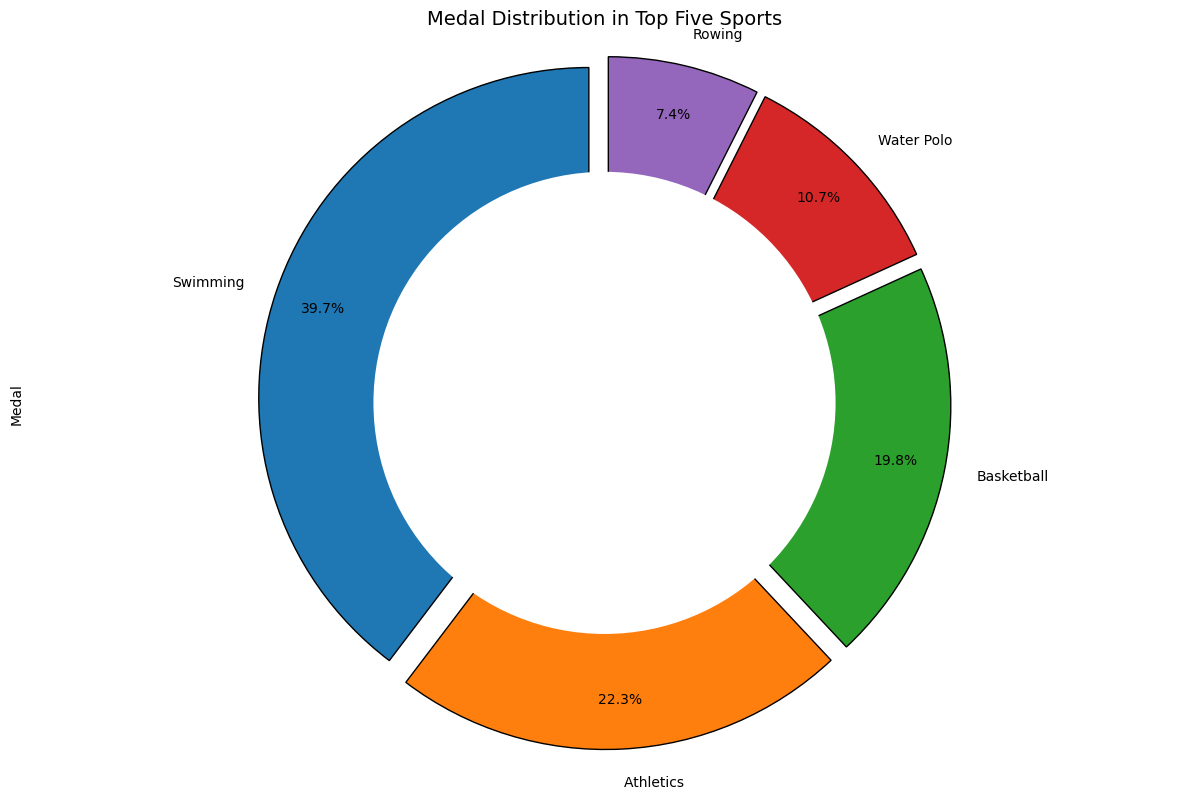

In [28]:
gold_usa_sport = df_olympic.query('Year > 2012 and Country == "USA" and Medal == "Gold"').groupby(['Sport', 'Medal'])['Medal'].size().sort_values(ascending= False).iloc[:5]
labels = ['Swimming', 'Athletics ', 'Basketball', 'Water Polo', 'Rowing']

fig1, ax1 = plt.subplots()
gold_usa_sport.plot(kind = 'pie', figsize = [12,8],autopct='%1.1f%%', labels = labels,explode = (0.05, 0.05, 0.05, 0.05, 0.05)
                    ,wedgeprops = {"edgecolor": "black"}, startangle = 90
                    ,pctdistance = 0.85);

centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')
plt.title('Medal Distribution in Top Five Sports', fontsize = 14)
plt.tight_layout()
plt.show()

## Most Medals in Sport with Above Age 50 athletes:

In [54]:
fifty = df_olympic.query('Medal != "No Medal" and Age >= 50').groupby('Sport').size()

In [55]:
medals_fifty = fifty.sort_values(ascending = False).head(10)

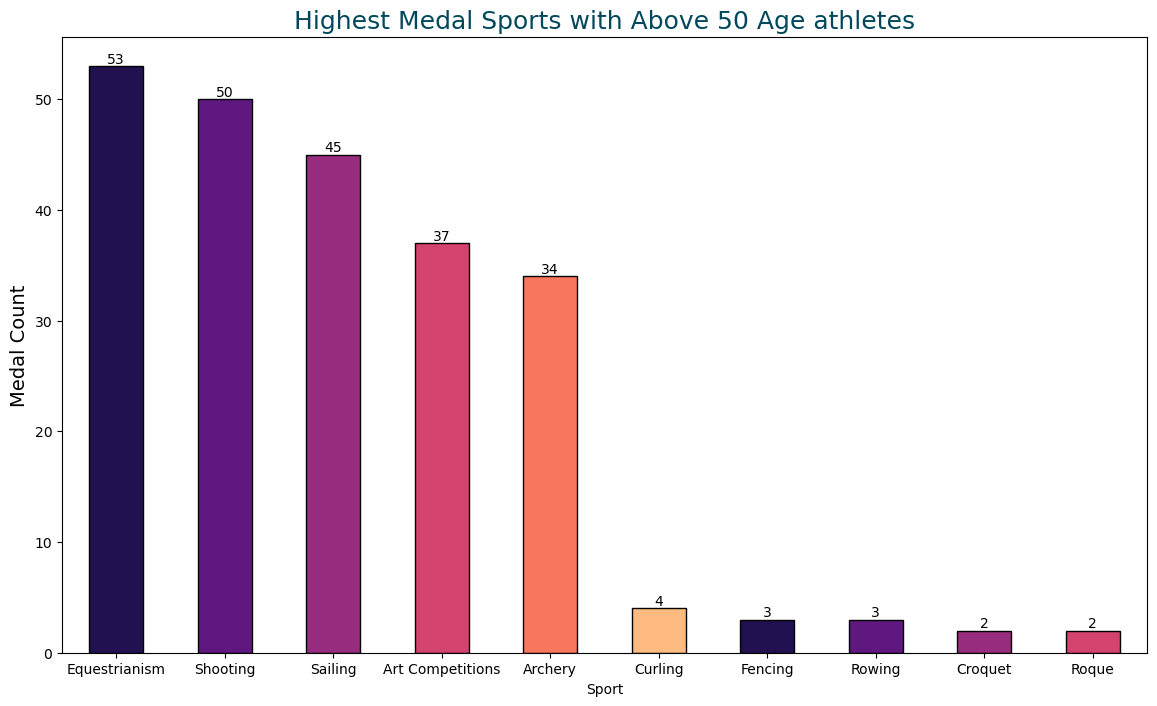

In [57]:
colors = sns.color_palette("magma")
ax = medals_fifty.plot(kind = 'bar', color = colors, edgecolor = 'black', rot = 0, figsize = [14,8])
ax.bar_label(ax.containers[0], fontsize = 10)

plt.title('Highest Medal Sports with Above 50 Age athletes', color = "#02485c", fontsize = 18)
plt.ylabel('Sport Name', fontsize  = 14)
plt.ylabel('Medal Count', fontsize  = 14)
plt.show()